**Data Description: Medical Diagnosis Dataset**
---

##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 - Arnav Negi**
##### **Team Member 2 - Arayana Singh**
##### **Team Member 3 - Ayush Singh**
##### **Team Member 4 - Akshita Sharda**

---





This dataset contains information about patients admitted to a hospital, including demographic details, medical conditions, treatments, and billing information. The dataset comprises the following columns:

- **Name**: Names of the patients admitted to the hospital.
- **Age**: Age of the patients at the time of admission.
- **Gender**: Gender of the patients (e.g., male, female).
- **Blood Type**: Blood type of the patients.
- **Medical Condition**: Description of the medical condition or diagnosis for which the patient is admitted.
- **Date of Admission**: Date when the patient was admitted to the hospital.
- **Doctor**: Name or identifier of the doctor responsible for the patient's care.
- **Hospital**: Name or identifier of the hospital where the patient is admitted.
- **Insurance Provider**: Name of the insurance provider covering the patient's medical expenses.
- **Billing Amount**: Amount billed to the patient or their insurance provider for medical services received during the hospital stay.
- **Room Number**: Identifier of the room where the patient is accommodated.
- **Admission Type**: Type of admission, such as emergency, elective, or transfer.
- **Discharge Date**: Date when the patient was discharged from the hospital.
- **Medication**: List of medications prescribed to the patient during their hospitalization.
- **Test Results**: Results of medical tests conducted on the patient during their hospital stay.

This dataset provides valuable insights into patient demographics, medical conditions, treatment patterns, and hospital operations. It can be used for various analyses, including patient outcome prediction, resource allocation optimization, and healthcare quality improvement initiatives.

---


**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline




In [2]:
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

**LOADING DOCUMENTS**

In [3]:
df= pd.read_csv("healthcare_dataset.csv")

**DATASET FIRST PREVIEW**

In [4]:
df.head()

Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Emergency   
2           Medicare    36874.896997          292      Emergency   
3           Medicare    23303.322092          480         Urgent   
4   UnitedHealthcare    18086.344184          477         Urgent   

  Discharge Date   Medication  Test Results  
0     2022-12-01      Aspirin  Inconclusive  
1     2023-06-15      Lipitor        Normal  
2     2019-02-08      Lipitor        Normal  
3     2020-05-03   Penicillin      Abnormal  
4     2021-08-02  Paracetamol        Normal

In [5]:
df.tail()

Name  Age  Gender Blood Type Medical Condition  \
9995            James Hood   83    Male         A+           Obesity   
9996       Stephanie Evans   47  Female        AB+         Arthritis   
9997  Christopher Martinez   54    Male         B-         Arthritis   
9998           Amanda Duke   84    Male         A+         Arthritis   
9999             Eric King   20    Male         B-         Arthritis   

     Date of Admission             Doctor                   Hospital  \
9995        2022-07-29       Samuel Moody   Wood, Martin and Simmons   
9996        2022-01-06  Christopher Yates               Nash-Krueger   
9997        2022-07-01   Robert Nicholson            Larson and Sons   
9998        2020-02-06        Jamie Lewis               Wilson-Lyons   
9999        2023-03-22        Tasha Avila  Torres, Young and Stewart   

     Insurance Provider  Billing Amount  Room Number Admission Type  \
9995   UnitedHealthcare    39606.840083          110       Elective   
9996         Blue Cross     5995.717488          244      Emergency   
9997         Blue Cross    49559.202905          312       Elective   
9998   UnitedHealthcare    25236.344761          420         Urgent   
9999              Aetna    37223.965865          290      Emergency   

     Discharge Date  Medication Test Results  
9995     2022-08-02   Ibuprofen     Abnormal  
9996     2022-01-29   Ibuprofen       Normal  
9997     2022-07-15   Ibuprofen       Normal  
9998     2020-02-26  Penicillin       Normal  
9999     2023-04-15  Penicillin     Abnormal

In [6]:
#Check the shape of data
print(f'The Training Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The Training Dataset has 10000 rows and 15 columns.


**DATASET INFORMATION**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

**CHECKING NULL VALUES**

In [8]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

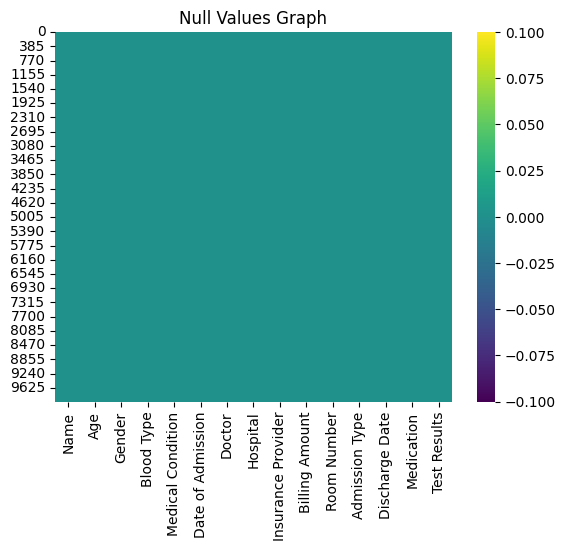

In [9]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.title("Null Values Graph")
plt.show()

There is no Null Value in our Dataset

**UNDERSTANDING DATASET**

In [10]:
columns= df.columns
print("Dataset Columns: ")
print(columns)

Dataset Columns: 
Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [11]:
df.describe()

Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.452200    25516.806778    300.082000
std       19.588974    14067.292709    115.806027
min       18.000000     1000.180837    101.000000
25%       35.000000    13506.523967    199.000000
50%       52.000000    25258.112566    299.000000
75%       68.000000    37733.913727    400.000000
max       85.000000    49995.902283    500.000000

In [12]:
for column in df.columns:
    unique_values=df[column].unique()
    print(f"Unique values for {column}: {unique_values}\n")

Unique values for Name: ['Tiffany Ramirez' 'Ruben Burns' 'Chad Byrd' ... 'Christopher Martinez'
 'Amanda Duke' 'Eric King']

Unique values for Age: [81 35 61 49 51 41 82 55 33 39 45 23 85 72 65 32 64 66 80 79 54 26 70 74
 56 37 78 83 30 19 46 48 34 84 47 60 57 21 27 68 31 42 71 38 28 43 69 73
 67 44 20 59 76 40 36 29 53 77 24 75 25 62 52 50 22 63 58 18]

Unique values for Gender: ['Female' 'Male']

Unique values for Blood Type: ['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']

Unique values for Medical Condition: ['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']

Unique values for Date of Admission: ['2022-11-17' '2023-06-01' '2019-01-09' ... '2020-07-03' '2022-02-19'
 '2022-07-29']

Unique values for Doctor: ['Patrick Parker' 'Diane Jackson' 'Paul Baker' ... 'Robert Nicholson'
 'Jamie Lewis' 'Tasha Avila']

Unique values for Hospital: ['Wallace-Hamilton' 'Burke, Griffin and Cooper' 'Walton LLC' ...
 'Nash-Krueger' 'Wilson-Lyons' 'Torres, Young and Stewart']

Unique values

In [13]:
# Assuming df is your DataFrame and 'Date of Admission' and 'Discharge Date' are the column names
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])


# Now 'Date of Admission' and 'Discharge Date' columns are converted to datetime format


In [14]:
df.describe()

Age              Date of Admission  Billing Amount  \
count  10000.000000                          10000    10000.000000   
mean      51.452200  2021-05-01 21:53:25.439999744    25516.806778   
min       18.000000            2018-10-30 00:00:00     1000.180837   
25%       35.000000            2020-02-10 00:00:00    13506.523967   
50%       52.000000            2021-05-02 00:00:00    25258.112566   
75%       68.000000            2022-07-23 06:00:00    37733.913727   
max       85.000000            2023-10-30 00:00:00    49995.902283   
std       19.588974                            NaN    14067.292709   

        Room Number              Discharge Date  
count  10000.000000                       10000  
mean     300.082000  2021-05-17 11:22:24.960000  
min      101.000000         2018-11-01 00:00:00  
25%      199.000000         2020-02-23 18:00:00  
50%      299.000000         2021-05-18 00:00:00  
75%      400.000000         2022-08-07 00:00:00  
max      500.000000         2023-11-27 00:00:00  
std      115.806027                         NaN

**DATA VISUALIZATION**

CHART 1

Text(0, 0.5, 'Frequency')

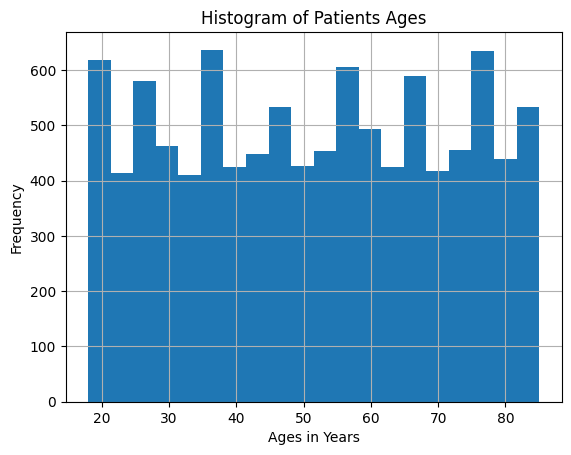

In [18]:
#Patients Age distribution
df['Age'].hist(bins=20)
plt.title('Histogram of Patients Ages')
plt.xlabel('Ages in Years')
plt.ylabel('Frequency')

CHART 2

In [19]:
fig = px.pie(df, names='Medical Condition', title='Pie Chart for Medical Conditions')
fig.show()


CHART 3

In [20]:
date=df['Date of Admission'].to_numpy()
date


array(['2022-11-17T00:00:00.000000000', '2023-06-01T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', ...,
       '2022-07-01T00:00:00.000000000', '2020-02-06T00:00:00.000000000',
       '2023-03-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [22]:
from collections import Counter
from datetime import datetime

def count_dates_by_month_year(date_array):
    month_year_count = Counter()
    for date_str in date_array:
        date = datetime.strptime(date_str, "%Y-%m-%d")  
        month_year = date.strftime("%Y-%m")
        month_year_count[month_year] += 1
    return month_year_count\

result=count_dates_by_month_year(date)

months_years, counts = zip(*sorted(result.items()))

plt.figure(figsize=(10, 6))
plt.plot(months_years, counts, marker='o', linestyle='-', color='skyblue')
plt.title('Date Counts by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: strptime() argument 1 must be str, not numpy.datetime64

CHART 4

In [ ]:
date=df['Discharge Date'].to_numpy()
date

array(['2022-12-01', '2023-06-15', '2019-02-08', ..., '2022-07-15',
       '2020-02-26', '2023-04-15'], dtype=object)

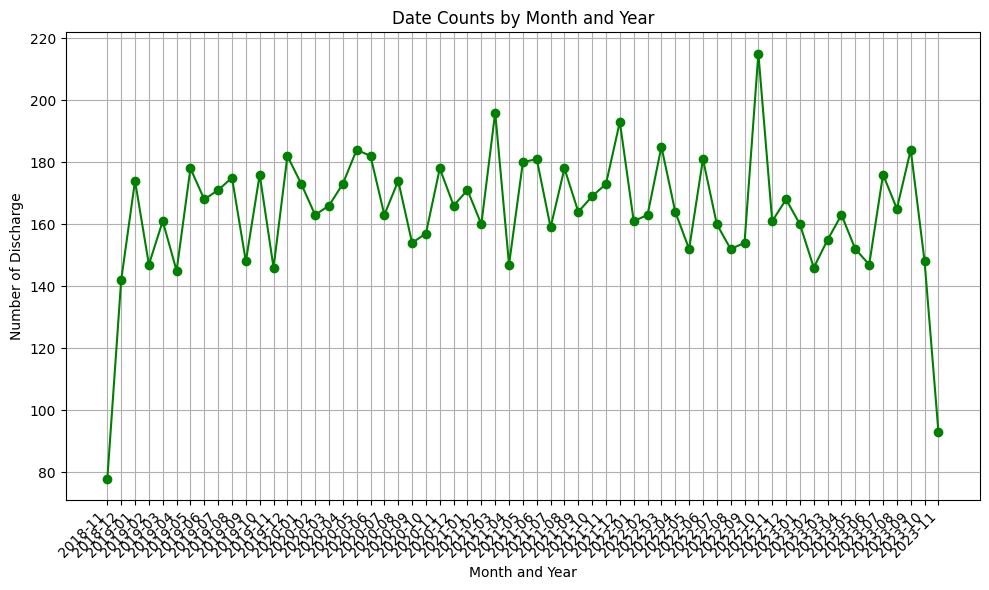

In [ ]:
from collections import Counter
from datetime import datetime

def count_dates_by_month_year(date_array):
    month_year_count = Counter()
    for date_str in date_array:
        date = datetime.strptime(date_str, "%Y-%m-%d")  
        month_year = date.strftime("%Y-%m")
        month_year_count[month_year] += 1
    return month_year_count\

result=count_dates_by_month_year(date)

months_years, counts = zip(*sorted(result.items()))

plt.figure(figsize=(10, 6))
plt.plot(months_years, counts, marker='o', linestyle='-', color='green')
plt.title('Date Counts by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Number of Discharge')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

CHART 5

In [ ]:
insurance_provider_distribution = df['Insurance Provider'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(insurance_provider_distribution, labels=insurance_provider_distribution.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightblue', 'grey', 'blue'])
plt.title('Insurance Provider Distribution')
plt.show()

CHART 6

In [ ]:
# Group by 'Blood Type' and 'Medical Condition' and calculate the count for each combination
grouped_df = df.groupby(['Blood Type', 'Medical Condition']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Blood Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Blood Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Medical Condition': 'Medical Condition'})
fig.show()


CHART 7

<Axes: xlabel='Admission Type'>

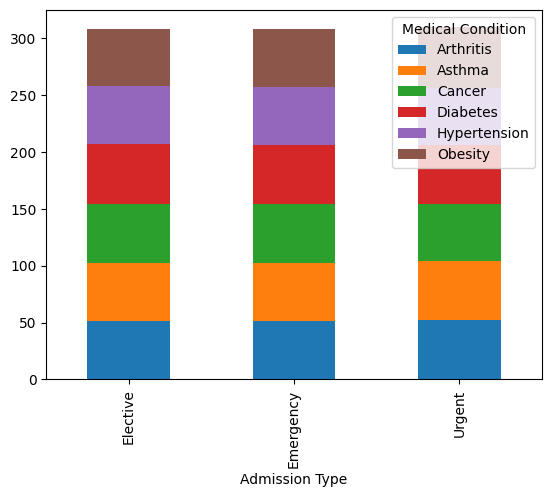

In [ ]:
df1= df.groupby(['Admission Type','Medical Condition'])['Age'].mean().unstack()
df1.plot(kind='bar',stacked=True)

CHART 8

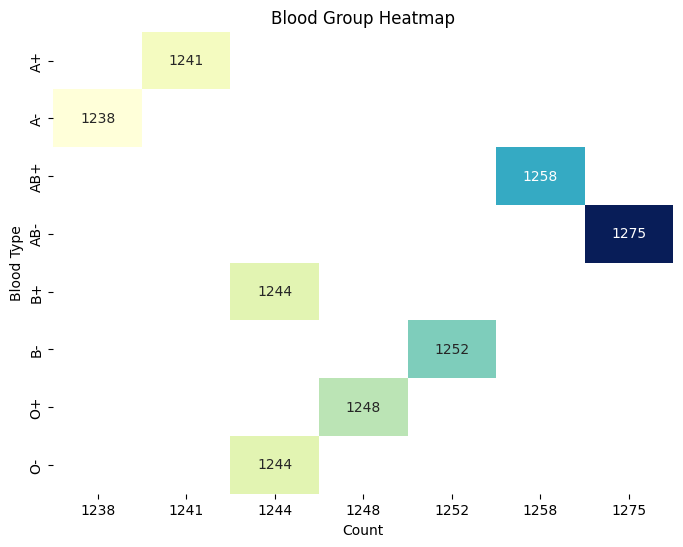

In [ ]:
# Chart - 8 visualization code
heatmap_data = df.pivot_table(index='Blood Type', aggfunc='size').reset_index(name='Count')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.pivot(index='Blood Type', columns='Count', values='Count'),
            annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.title('Blood Group Heatmap')
plt.xlabel('Count')
plt.ylabel('Blood Type')

# Show the plot
plt.show()

CHART 9

In [ ]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df.sort_values('Discharge Date', inplace=True)
medication_distribution = df.groupby('Discharge Date')['Medication'].count()
plt.figure(figsize=(12, 6))
plt.plot(medication_distribution.index, medication_distribution.values, marker='o', color='green')
plt.title('Medication Distribution Over Time')
plt.xlabel('Discharge Date')
plt.ylabel('Count')
plt.show()


CHART 10

In [ ]:

fig = go.Figure(data=go.Violin(y=df['Doctor'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Doctor'))

fig.update_layout(yaxis_zeroline=False)
fig.show()


CHART 11

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Age'], df['Billing Amount'], s=df['Billing Amount']/500, c=df['Insurance Provider'].astype('category').cat.codes, cmap='viridis', alpha=0.7)

# Add labels and legend
plt.title('Bubble Chart of Patient Data')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
legend = plt.legend(*scatter.legend_elements(), title='Insurance Provider')
plt.show()


CHART 12

In [ ]:
# Create a pivot table to count occurrences of each medication for each medical condition
heatmap_data = df.groupby(['Medical Condition', 'Medication']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlOrRd", fmt='g', cbar_kws={'label': 'Number of Patients'})
plt.title('Medication vs. Medical Condition')
plt.show()

CHART 13

In [ ]:
medication_counts = df['Medication'].value_counts()

# Plot the horizontal bar graph
plt.figure(figsize=(10, 6))
medication_counts.plot(kind='barh', color='purple')
plt.xlabel('Number of Patients')
plt.title('Medication Distribution')
plt.show()

**CATEGORICAL COLUMNS**

In [ ]:
df['Gender'].value_counts()

Gender
Female    5075
Male      4925
Name: count, dtype: int64

In [ ]:
print(df['Blood Type'].value_counts())

Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64


In [ ]:
print(df['Admission Type'].value_counts())

Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64


In [ ]:
print(df['Insurance Provider'].value_counts())

Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64


In [ ]:
print(df['Doctor'].value_counts().sum())

10000


In [ ]:
print(df['Test Results'].value_counts())

Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64


**CATEGORICAL ENCODING**

LOWERCASING

In [ ]:
# Convert the 'Name' column to lowercase
df['Name'] = df['Name'].str.lower()

# Display the updated DataFrame
df.head()

Name  Age  Gender Blood Type Medical Condition  \
0      tiffany ramirez   81  Female         O-          Diabetes   
1          ruben burns   35    Male         O+            Asthma   
2            chad byrd   61    Male         B-           Obesity   
3    antonio frederick   49    Male         B-            Asthma   
4  mrs. brandy flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Emergency   
2           Medicare    36874.896997          292      Emergency   
3           Medicare    23303.322092          480         Urgent   
4   UnitedHealthcare    18086.344184          477         Urgent   

  Discharge Date   Medication  Test Results  
0     2022-12-01      Aspirin  Inconclusive  
1     2023-06-15      Lipitor        Normal  
2     2019-02-08      Lipitor        Normal  
3     2020-05-03   Penicillin      Abnormal  
4     2021-08-02  Paracetamol        Normal

**DATA PREPROCESSING**

In [ ]:
#data preprocessing
df = df.drop(['Name','Blood Type','Date of Admission','Discharge Date','Doctor','Hospital','Medication','Room Number','Billing Amount'], axis = 1)

In [ ]:
for x in df.select_dtypes(include = 'object'):
  print(df[x].value_counts())

Gender
Female    5075
Male      4925
Name: count, dtype: int64
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64
Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64
Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64
Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64


**ENCODING CATEGORICAL DATA**

In [ ]:
#encoding categorical data

refactored_values = {
    'Gender': {
        'Male': 0,
        'Female': 1
    },

  'Medical Condition':{
      'Asthma': 0,
      'Cancer': 1,
      'Hypertension': 2,
      'Arthritis': 3,
      'Obesity': 4,
      'Diabetes': 5
  },
  
    'Insurance Provider':{
        'Cigna': 0,
        'Blue Cross': 1,
        'Aetna': 2,
        'UnitedHealthcare': 3,
        'Medicare': 4
    },

    'Admission Type':{
        'Urgent': 0,
        'Emergency': 1,
        'Elective': 2
    },
    
    'Test Results':{
        'Abnormal': 0,
        'Inconclusive': 1,
        'Normal': 2
    },
    
}
df.replace(refactored_values, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18428\1461197989.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(refactored_values, inplace = True)


In [ ]:
df.head()

Age  Gender  Medical Condition  Insurance Provider  Admission Type  \
8637  0.611940       0                  0                   3               1   
914   0.686567       1                  0                   4               0   
8212  0.850746       1                  0                   1               0   
2088  0.447761       0                  4                   1               2   
9422  0.985075       0                  0                   2               0   

      Test Results  Gender_LabelEncoded  BloodType_LabelEncoded  
8637             2                    1                       6  
914              2                    0                       2  
8212             0                    0                       3  
2088             0                    1                       7  
9422             0                    1                       1

In [ ]:
df.tail()

Age  Gender  Medical Condition  Insurance Provider  Admission Type  \
4283  0.253731       0                  5                   0               1   
8984  0.716418       1                  2                   0               2   
4997  0.611940       1                  0                   0               2   
63    0.567164       1                  5                   2               0   
9721  0.910448       0                  5                   4               2   

      Test Results  Gender_LabelEncoded  BloodType_LabelEncoded  
4283             1                    1                       2  
8984             2                    0                       3  
4997             1                    0                       7  
63               1                    0                       6  
9721             1                    1                       4

In [ ]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = [150,100])
sns.histplot(ax = axs[0,0], data = df, x = 'Age', kde = True)
sns.histplot(ax = axs[0,1], data = df, x = 'Gender', kde = True)
sns.histplot(ax = axs[1,0], data = df, x = 'Medical Condition', kde = True)
sns.histplot(ax = axs[1,1], data = df, x = 'Insurance Provider', kde = True)
sns.histplot(ax = axs[2,0], data = df, x = 'Admission Type', kde = True)
sns.histplot(ax = axs[2,1], data = df, x = 'Test Results', kde = True)

fig.suptitle('Histogram', fontsize = 120)
plt.tight_layout()
plt.show()

In [ ]:
# Group by "Age" and calculate the mean satisfaction
grouped_df = df.groupby("Age")["Test Results"].apply(lambda x: x.value_counts(normalize=True)).unstack(fill_value=0)

# Reset index to make "Age" a regular column
grouped_df = grouped_df.reset_index()

# Sort values by "satisfaction" in descending order
grouped_df = grouped_df.sort_values(by="Age", ascending=False)

# Display the resulting DataFrame
print(grouped_df)

    Age         0         1         2
67   85  0.390244  0.317073  0.292683
66   84  0.375940  0.255639  0.368421
65   83  0.328244  0.297710  0.374046
64   82  0.285714  0.340136  0.374150
63   81  0.364780  0.327044  0.308176
..  ...       ...       ...       ...
4    22  0.398374  0.252033  0.349593
3    21  0.300654  0.346405  0.352941
2    20  0.343195  0.325444  0.331361
1    19  0.378788  0.295455  0.325758
0    18  0.359756  0.317073  0.323171

[68 rows x 4 columns]


In [ ]:
x = df.drop(columns = 'Test Results', axis = 1)
y = df['Test Results']

In [ ]:
print(y)

0       1
1       2
2       2
3       0
4       2
       ..
9995    0
9996    2
9997    2
9998    2
9999    0
Name: Test Results, Length: 10000, dtype: int64


In [ ]:
print(x)

           Age  Gender  Medical Condition  Insurance Provider  Admission Type  \
8637  0.611940       0                  0                   3               1   
914   0.686567       1                  0                   4               0   
8212  0.850746       1                  0                   1               0   
2088  0.447761       0                  4                   1               2   
9422  0.985075       0                  0                   2               0   
...        ...     ...                ...                 ...             ...   
4283  0.253731       0                  5                   0               1   
8984  0.716418       1                  2                   0               2   
4997  0.611940       1                  0                   0               2   
63    0.567164       1                  5                   2               0   
9721  0.910448       0                  5                   4               2   

      Gender_LabelEncoded  

**DATA SCALING**

In [ ]:
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)
print(x)

[[ 1.50846482  0.98511083  1.48476922  1.43927185  1.24635266]
 [-0.83991244 -1.01511421 -1.44446298  0.72971168  0.01829801]
 [ 0.48743123 -1.01511421  0.89892278  1.43927185  0.01829801]
 ...
 [ 0.13006947 -1.01511421  0.31307634 -0.68940866  1.24635266]
 [ 1.66161985 -1.01511421  0.31307634  0.72971168 -1.20975664]
 [-1.60568763 -1.01511421  0.31307634  0.02015151  0.01829801]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(10000, 5) (7500, 5) (2500, 5)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(10000,) (7500,) (2500,)


**ML MODEL**

In [ ]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])

**LOGISTIC REGRESSION**

In [ ]:
LRmodel = LogisticRegression()

In [ ]:
LRmodel.fit(x_train, y_train)
y_pred = model.predict(x_test)

NameError: name 'model' is not defined

In [ ]:
acc = LRmodel.score(x_test, y_test)
print('Logistic Regression scores')
print(f'Model accuracy\t\t: {acc}')
print(f'Accuracy in Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))

Logistic Regression scores
Model accuracy		: 0.3324
Accuracy in Percentage	: 33.2%
              precision    recall  f1-score   support

           0       0.34      0.36      0.35       854
           1       0.34      0.34      0.34       805
           2       0.34      0.32      0.33       841

    accuracy                           0.34      2500
   macro avg       0.34      0.34      0.34      2500
weighted avg       0.34      0.34      0.34      2500



In [ ]:
#confusion matrix for logistic regression

con_matrix = confusion_matrix(y_test, y_pred)

#create a heatmap of the confusion matrix

sns.set(font_scale=1.2)
sns.heatmap(con_matrix, annot = True, annot_kws={"size":16}, cmap='Blues', fmt='g')

plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('Confusion matrix for SVC')

NameError: name 'y_pred' is not defined

**SVM**

In [ ]:
model = SVC()

In [ ]:
#utilize a training set to train the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
#utilizing testing set to test model
acc = model.score(x_test, y_test)

print('SVC Classifier scores')
print(f'Model accuracy\t\t: {acc}')
print(f'Accuracy in percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))

SVC Classifier scores
Model accuracy		: 0.3364
Accuracy in percentage	: 33.6%
              precision    recall  f1-score   support

           0       0.35      0.51      0.41       860
           1       0.31      0.23      0.26       815
           2       0.35      0.25      0.29       825

    accuracy                           0.34      2500
   macro avg       0.33      0.33      0.32      2500
weighted avg       0.33      0.34      0.33      2500



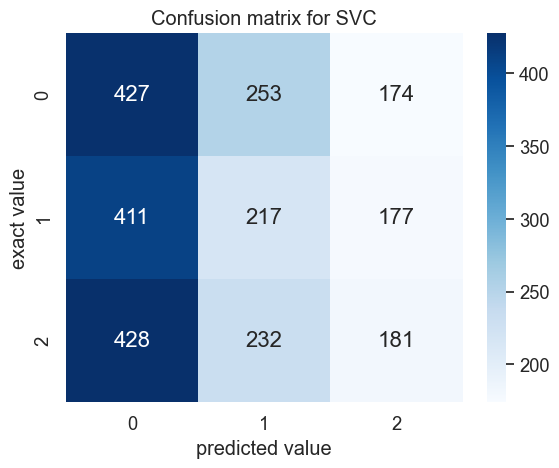

In [ ]:
con_matrix = confusion_matrix(y_test, y_pred)

#create  a heatmap of the confusion matrix

sns.set(font_scale=1.2)
sns.heatmap(con_matrix, annot = True, annot_kws={"size":16}, cmap = 'Blues', fmt='g')

#add labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('Confusion matrix for SVC')
plt.show()

**DECISION TREE**

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
acc = model.score(x_test, y_test)

print('Decision tree Classifier scores')
print(f'Model accuracy\t\t: {acc}')
print(f'Accuracy in Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))

Decision tree Classifier scores
Model accuracy		: 0.346
Accuracy in Percentage	: 34.6%
              precision    recall  f1-score   support

           0       0.35      0.35      0.35       854
           1       0.33      0.34      0.33       805
           2       0.36      0.35      0.35       841

    accuracy                           0.35      2500
   macro avg       0.35      0.35      0.35      2500
weighted avg       0.35      0.35      0.35      2500



In [ ]:
#confusion matrix for decision tree

con_matrix = confusion_matrix(y_test, y_pred)

#create a heatmap of the confusion matrix

sns.set(font_scale=1.2)
sns.heatmap(con_matrix, annot= True, annot_kws={"size":16}, cmap = 'Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('Confusion matrix for decision tree classifier')
plt.show()

### ***Some Questions from Data***

1. **What is the most common blood type among the patients?**


In [ ]:
most_common_blood_type = df['Blood Type'].value_counts().idxmax()
print(f"The most common blood type among the patients is {most_common_blood_type}.")


The most common blood type among the patients is A-.


2. **How many unique hospitals are included in the dataset?**


In [ ]:
unique_hospitals = df['Hospital'].nunique()
print(f"There are {unique_hospitals} unique hospitals included in the dataset.")


There are 39876 unique hospitals included in the dataset.


4. **Which doctor has treated the highest number of patients?**


In [ ]:
doctor_highest_patient_count = df['Doctor'].value_counts().idxmax()
print(f"The doctor who has treated the highest number of patients is {doctor_highest_patient_count}.")


The doctor who has treated the highest number of patients is Michael Smith.


5. **What is the most frequently prescribed medication?**


In [ ]:
most_frequent_medication = df['Medication'].value_counts().idxmax()
print(f"The most frequently prescribed medication is {most_frequent_medication}.")


The most frequently prescribed medication is Lipitor.


6. **Are there any seasonal trends in hospital admissions?**


In [ ]:
# Calculate monthly admissions
monthly_admissions = df['Date of Admission'].dt.month.value_counts().sort_index()

# Create a DataFrame
monthly_admissions_df = pd.DataFrame({'Month': monthly_admissions.index, 'Admissions': monthly_admissions.values})

# Plot the trend using Plotly Express
fig = px.line(monthly_admissions_df, x='Month', y='Admissions', title='Monthly Admissions Trend')
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Number of Admissions')
fig.show()


7. **What is the average billing amount for patients?**


In [ ]:
average_billing_amount = df['Billing Amount'].mean()
print(f"The average billing amount for patients is ${average_billing_amount:.2f}.")


The average billing amount for patients is $25539.32.


8. **How many male and female patients are there?**


In [ ]:
male_patients = df[df['Gender'] == 'Male'].shape[0]
female_patients = df[df['Gender'] == 'Female'].shape[0]
print(f"There are {male_patients} Male patients and {female_patients} Female patients.")


There are 27774 Male patients and 27726 Female patients.


9. **What are the top three most common medical conditions for which patients are admitted?**


In [ ]:
top_three_medical_conditions = df['Medical Condition'].value_counts().head(3)
print("Top Three Most Common Medical Conditions:")
print("----------------------------------------")
print(top_three_medical_conditions)


Top Three Most Common Medical Conditions:
----------------------------------------
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Name: count, dtype: int64
